In [1]:
using JLD
#using Plotly
#using WebIO
using Plots
using DSP
using Interpolations
using Statistics

In [2]:
include("../ToolBox/ToolBox.jl")
using .ToolBox
using .Load
using .SlcUtil
using Dates

proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode


In [3]:
#Plotly.set_credentials_file(Dict("username"=>"eyhl","api_key"=>"aAaQP6QOTl2qhdCQ71e4"))

In [4]:
result_folder = "/Users/eyu/Google Drive/DTU/10_semester/Persistent_scaterer/ps_estimation/lemvig_interferogram"

"/Users/eyu/Google Drive/DTU/10_semester/Persistent_scaterer/ps_estimation/lemvig_interferogram"

In [5]:
intfg_files = readdir(result_folder)
index = [ split(elem, ".")[end] == "jld" for elem in intfg_files]
intfg_files = intfg_files[index];

In [6]:
interferogram_files = Array{String,1}(undef, 34);
i = 1
for (index, file) in enumerate(intfg_files)
    tmp = split(file, "_")
    for elem in tmp
        if elem == "infgm"
            interferogram_files[i] = file
            i = i + 1
        end            
    end
end

In [7]:
intfg_paths = result_folder.*"/".*interferogram_files
dates = [split(elem, "_")[end][1:8] for elem in intfg_paths]
year = [d[1:4] for d in dates]
month = [d[5:6] for d in dates]
day = [d[7:8] for d in dates]
date_int = [parse.(Int, [year[k], month[k], day[k]]) for k in 1:length(dates)]
dates = [DateTime(date_int[k]...) for k in 1:length(dates)]
intfg_file_paths_sorted = intfg_paths[sortperm(dates)];
intfg_files_sorted = [rm_extension[1:end-4] for rm_extension in interferogram_files[sortperm(dates)]];

In [8]:
intfg_data = [JLD.load(file)["data"] for file in intfg_file_paths_sorted];
insert!(intfg_data, 20, similar(intfg_data[1]));

In [9]:
data_files = Array{String,1}(undef, 35);
i = 1
for (index, file) in enumerate(intfg_files)
    tmp = split(file, "_")
    for elem in tmp
        if elem == "data"
            data_files[i] = file
            i = i + 1
        end            
    end
end

In [10]:
data_paths = result_folder.*"/".*data_files
dates = [split(elem, "_")[end][1:8] for elem in data_paths]
year = [d[1:4] for d in dates]
month = [d[5:6] for d in dates]
day = [d[7:8] for d in dates]
date_int = [parse.(Int, [year[k], month[k], day[k]]) for k in 1:length(dates)]
dates = [DateTime(date_int[k]...) for k in 1:length(dates)]
data_file_paths_sorted = data_paths[sortperm(dates)];
data_files_sorted = [rm_extension[1:end-4] for rm_extension in data_files[sortperm(dates)]];

In [11]:
master_data = JLD.load(data_file_paths_sorted[20])["data"];

In [12]:
slave_data = [JLD.load(file)["data"] for file in data_file_paths_sorted];
deleteat!(slave_data, 20);

In [13]:
flat_files = Array{String,1}(undef, 34);
i = 1
for (index, file) in enumerate(intfg_files)
    tmp = split(file, "_")
    for elem in tmp
        if elem == "flatVV"
            flat_files[i] = file
            i = i + 1
        end            
    end
end

In [14]:
flat_paths = result_folder.*"/".*flat_files
dates = [split(elem, "_")[end][1:8] for elem in flat_paths]
year = [d[1:4] for d in dates]
month = [d[5:6] for d in dates]
day = [d[7:8] for d in dates]
date_int = [parse.(Int, [year[k], month[k], day[k]]) for k in 1:length(dates)]
dates = [DateTime(date_int[k]...) for k in 1:length(dates)]
flat_file_paths_sorted = flat_paths[sortperm(dates)];
flat_files_sorted = [rm_extension[1:end-4] for rm_extension in flat_files[sortperm(dates)]];

In [15]:
flat_data = [JLD.load(file)["data"] for file in flat_file_paths_sorted];

In [16]:
size(slave_data[1]), size(master_data), size(intfg_data[1]), size(flat_data[1])

((351, 1051), (351, 1051), (351, 1051), (351, 1051))

In [17]:
DIn_ref = [DIn .* conj(master_data) .* slave_data[1] .* conj(flat_data[1]) for DIn in intfg_data];

In [18]:
DIn_ref[20] = conj(master_data) .* slave_data[1] .* conj(flat_data[1]);

### Find coordinates (row, col)

In [25]:
LVS1_coords = (56 + (33/60) + (44.4528/3600), 8 + (18/60) + (24.865/3600))
LVS2_coords = (56 + (33/60) + (42.5556/3600), 8 + (18/60) + (26.874/3600))
LVS3_coords = (56 + (33/60) + (42.8652/3600), 8 + (18/60) + (22.104/3600))
LVS1_coords, LVS2_coords, LVS3_coords

((56.562348, 8.306906944444446), (56.561820999999995, 8.307465), (56.561907, 8.306140000000001))

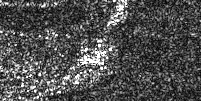

In [26]:
img = SlcUtil.show_img(master_data[200:300, 400:600])

In [27]:
all_three_crs =  master_data[235:260, 480:515];

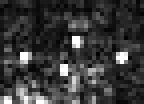

In [28]:
img = SlcUtil.show_img(all_three_crs)

In [29]:
CR1 = master_data[244:246, 498:500];
println(findmax(real.(CR1)))
CR1_coords = [245, 499]
CR1 = master_data[CR1_coords...]

(2.435512560088463, CartesianIndex(2, 2))


2.435512560088463 + 1.9885977375402244im

In [30]:
CR3 = master_data[248:250, 485:487]
println(findmax(real.(CR3)))
CR3_coords = [249, 486]
CR3 = master_data[CR3_coords...]

(1.7079365640553448, CartesianIndex(2, 2))


1.7079365640553448 + 2.5047426689898873im

In [31]:
CR2 = master_data[248:250, 509:511];
println(findmax(real.(CR2)))
CR2_coords = [250, 510]
CR2 = master_data[CR2_coords...]

(0.5266079494905986, CartesianIndex(3, 2))


0.5266079494905986 + 1.4447073351156554im

In [32]:
positions = hcat(CR1_coords, CR2_coords, CR3_coords);

In [33]:
plot(Gray.(abs.(master_data)), ylim=(220, 280), xlim=(450,550))
scatter!([positions[2, 1]], [positions[1, 1]], ms = 5, label="LVS1", markerstrokewidth=0)
scatter!([positions[2, 2]], [positions[1, 2]], ms = 5, label="LVS3", markerstrokewidth=0)
scatter!([positions[2, 3]], [positions[1, 3]], ms = 5, label="LVS2", markerstrokewidth=0)

### Deformation computation

#### Get relevant meta data
Commented code is for computing lambda from meta, but did not have file locally

In [34]:
# c = 2.99792458e8
# master_path = "/home/data/eigil/lemvig_slc/S1A_IW_SLC__1SDV_20170613T054034_20170613T054102_017011_01C547_641A.SAFE"
# file_paths = Load.slc_paths(master_path, "VV", 3)
# meta = Load.slc_meta(file_paths[2]);
#theta = 43.57341481475871; # meta["incidence_angle_mid"]
lambda = 0.05546576 # c/meta["radar_frequency"]

#### Compute phase differences between CRs


In [142]:
CR1_phase = [angle.(DIn[CR1_coords...]) for DIn in DIn_ref]
CR2_phase = [angle.(DIn[CR2_coords...]) for DIn in DIn_ref]
CR3_phase = [angle.(DIn[CR3_coords...]) for DIn in DIn_ref];

In [151]:
delta_phi_1 = unwrap(CR1_phase - CR3_phase)
delta_phi_2 = unwrap(CR2_phase - CR3_phase);

#### Convert to deformations 
cosd(incidence angle) to get vertical deformation

In [152]:
incidence_angle_dict = JLD.load(joinpath(result_folder, "incidence_angles.jld"));


In [153]:
theta = incidence_angle_dict["incidence_angle_mid"];

In [155]:
deformation_1 = - lambda ./ (4 .* pi .* cosd.(theta)) .* delta_phi_1;
deformation_2 = - lambda ./ (4 .* pi .* cosd.(theta)) .* delta_phi_2;

### SDFE DATA

In [133]:
dates = [split(elem, "_")[end][1:8] for elem in data_paths]
year = [d[1:4] for d in dates]
month = [d[5:6] for d in dates]
day = [d[7:8] for d in dates]
date_int = [parse.(Int, [year[k], month[k], day[k]]) for k in 1:length(dates)]
dates = [DateTime(date_int[k]...) for k in 1:length(dates)]

# data from SDFE data sheet
dates_true = ["2017-02-17", "2017-03-13", 
    "2017-04-21", "2017-05-10", "2017-05-10", 
    "2017-06-19", "2017-06-19", "2017-08-21", 
    "2017-08-21", "2017-09-21"]

lvs1_true = [0, 0.42, 0.57, 0.13, -7.34, -7.27, -7.35, 
              -7.35, -13.24, -13.46]

lvs2_true = [0, 0.05, 0.06, -1.43, -1.27, -1.99, 3.57, 
              3.51, 3.55, 3.38];

### Make date vectors, days since slave 1

In [134]:
days_since_start = (Day.(sort(dates)[1:end] .- sort(dates)[1]));
days_true_since_start = Day.(DateTime.(dates_true) .- sort(dates)[1]);

### Convert from day format to integers

In [135]:
int_days_true_since_start = [day.value for day in days_true_since_start];
int_days_since_start = [day.value for day in days_since_start];

### Constant interpolatation of SDFE Ground truth to estimated times

In [136]:
nodes = (int_days_true_since_start,)
itp = interpolate(nodes, lvs1_true, Gridded(Constant()))
lvs1_interpolated = itp(int_days_since_start);

In [137]:
nodes = (int_days_true_since_start,)
itp = interpolate(nodes, lvs2_true, Gridded(Constant()))
lvs2_interpolated = itp(int_days_since_start);

## Plot results

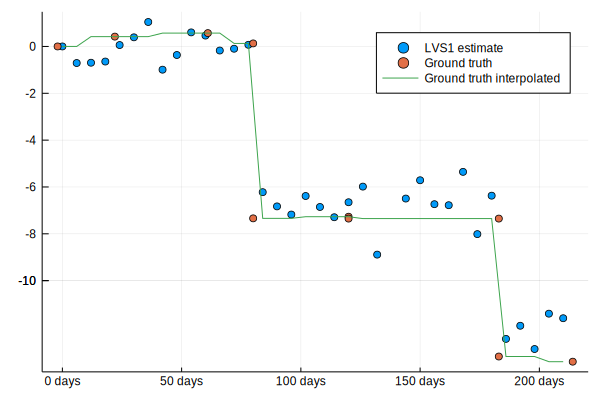

In [156]:
LVS1_plot = scatter(days_since_start, deformation_1*1e3, label = "LVS1 estimate", legend=:topright)
scatter!(days_true_since_start, lvs1_true, label = "Ground truth")
plot!(days_since_start, lvs1_interpolated, label = "Ground truth interpolated")

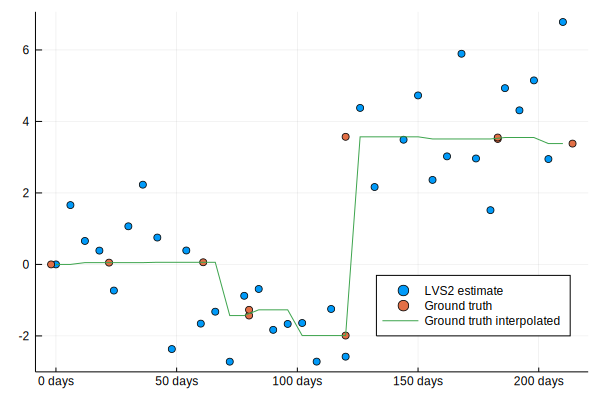

In [157]:
LVS2_plot = scatter(days_since_start, deformation_2*1e3,  label = "LVS2 estimate", legend=:bottomright)
scatter!(days_true_since_start, lvs2_true,  label = "Ground truth")
plot!(days_since_start, lvs2_interpolated, label = "Ground truth interpolated")

In [127]:
RMS1 = rms((lvs1_interpolated .- deformation_1*1e3));
RMS2 = rms((lvs2_interpolated .- deformation_2*1e3));

In [83]:
RMS1, RMS2

(0.9835554066032712, 1.2835675897541614)

In [79]:
std(deformation_1)*1e3, std(deformation_2)*1e3

(4.386064049889155, 2.721907952387455)

In [80]:
mean(deformation_1)*1e3, mean(deformation_2)*1e3

(-4.833798900882046, 1.1361984349683203)

In [106]:
feb_to_may_lvs1 = deformation_1[sort(dates) .< DateTime("2017-08-01")]
may_to_aug_lvs1 = deformation_1[DateTime("2017-05-01") .< sort(dates) .< DateTime("2017-08-01")]
aug_to_sep_lvs1 = deformation_1[DateTime("2017-08-01") .< sort(dates)]

feb_to_june_lvs2 = deformation_2[sort(dates) .< DateTime("2017-06-01")]
june_to_sep_lvs2 = deformation_2[DateTime("2017-06-01") .< sort(dates)];

In [104]:
println("feb - may: ", mean(feb_to_may_lvs1*1e3), ", ",std(feb_to_may_lvs1*1e3))
println("may - aug: ", mean(may_to_aug_lvs1*1e3), ", ",std(may_to_aug_lvs1*1e3))
println("aug - sep: ", mean(aug_to_sep_lvs1*1e3), ", ",std(aug_to_sep_lvs1*1e3))

feb - may: -3.2974861648191562, 3.4724844747414205
may - aug: -5.867492758521925, 2.4829486873516466
aug - sep: -10.018854385094302, 2.970323949742957


In [108]:
println("feb - june: ", mean(feb_to_june_lvs2)*1e3, ", ",std(feb_to_june_lvs2)*1e3)
println("june - sep: ", mean(june_to_sep_lvs2)*1e3, ", ",std(june_to_sep_lvs2)*1e3)

feb - june: -0.3951486173989716, 1.4345226283347323
june - sep: 2.8306711334997283, 2.7681921769802638


### LVS 1
| Date span | Mean (mm) | Std (mm) |
| --- | --- | --- |
| feb - may: | -3.297 | 3.472 |
| may - aug: | -5.867 | 2.483 |
| aug - sep: | -10.019 | 2.970 |

### LVS 2
| Date span | Mean (mm) | Std (mm) |
| --- | --- | --- |
| feb - jun: | -0.395 | 1.435 |
| jun - sep: | 2.830 | 2.738 |


### Testing the unwrap function
Similar output compared to Matlab documentation: https://www.mathworks.com/help/matlab/ref/unwrap.html

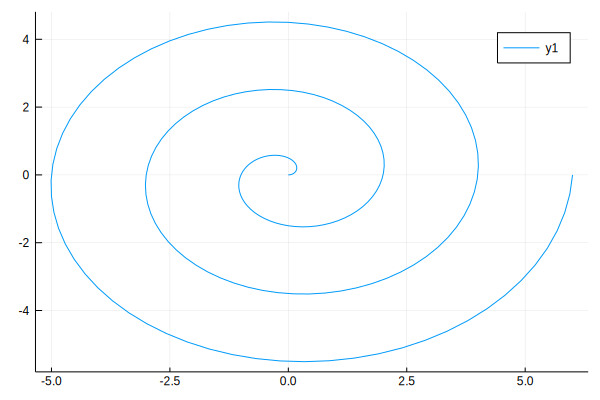

In [43]:
t = range(0, stop=6*pi, length=201);
x = t/pi.*cos.(t);
y = t/pi.*sin.(t);
plot(x,y)

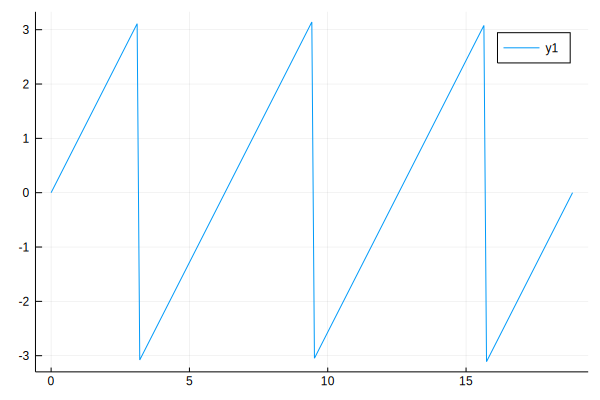

In [44]:
P = atan.(y,x);
plot(t,P)

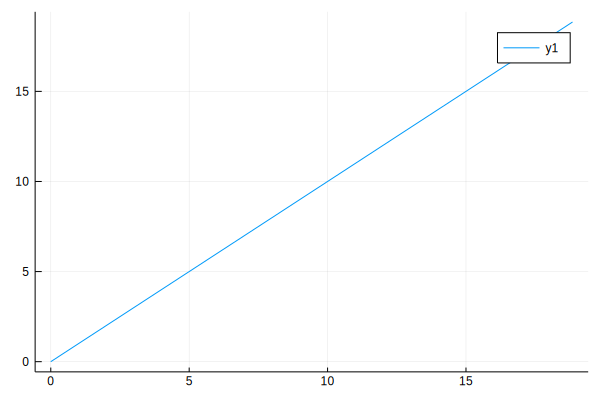

In [45]:
Q = unwrap(P);
plot(t,Q)